# Business Cycles

## Overview

In this lecture we review some empirical aspects of business cycles.

Business cycles are fluctuations in economic activity over time.

These include expansions (also called booms) and contractions (also called recessions).

For our study, we will use economic indicators from the [World Bank](https://documents.worldbank.org/en/publication/documents-reports/api) and [FRED](https://fred.stlouisfed.org/).

In addition to the packages already installed by Anaconda, this lecture requires

In [25]:
!pip install wbgapi
!pip install pandas-datareader

We use the following imports

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import wbgapi as wb
import pandas_datareader.data as web

Here’s some minor code to help with colors in our plots.

In [27]:
# Set graphical parameters
cycler = plt.cycler(linestyle=['-', '-.', '--', ':'], 
        color=['#377eb8', '#ff7f00', '#4daf4a', '#ff334f'])
plt.rc('axes', prop_cycle=cycler)

## Data acquisition

We will use the World Bank’s data API `wbgapi` and `pandas_datareader` to retrieve data.

We can use `wb.series.info` with the argument `q` to query available data from
the [World Bank](https://www.worldbank.org/en/home).

For example, let’s retrieve the GDP growth data ID to query GDP growth data.

In [28]:
wb.series.info(q='GDP growth')

id,value
NY.GDP.MKTP.KD.ZG,GDP growth (annual %)
,1 elements


Now we use this series ID to obtain the data.

In [29]:
gdp_growth = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG',
            ['USA', 'ARG', 'GBR', 'GRC', 'JPN'], 
            labels=True)
gdp_growth

,Country,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
economy,,,,,,,,,,,,,,,,,,,,,
JPN,Japan,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,10.638562,11.082142,12.882468,...,0.296206,1.560627,0.753827,1.675332,0.643391,-0.402169,-4.147119,2.559320,0.954737,1.679020
GRC,Greece,NaN,13.203841,0.364811,11.844866,9.409677,10.768011,6.494501,5.669485,7.203719,...,0.792225,-0.228302,-0.031795,1.473125,2.064673,2.277181,-9.196231,8.654498,5.743649,2.332124
GBR,United Kingdom,NaN,2.701314,1.098696,4.859545,5.594811,2.130333,1.567450,2.775738,5.472693,...,3.194637,2.222888,1.921710,2.656505,1.405190,1.624475,-10.296919,8.575951,4.839085,0.339966
ARG,Argentina,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,-0.659726,3.191997,4.822501,...,-2.512615,2.731160,-2.080328,2.818503,-2.617396,-2.000861,-9.900485,10.441812,5.269880,-1.611002
USA,United States,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,...,2.523820,2.945550,1.819451,2.457622,2.966505,2.583825,-2.163029,6.055053,2.512375,2.887556


We can look at the series’ metadata to learn more about the series (click to expand).

In [30]:
wb.series.metadata.get('NY.GDP.MKTP.KD.ZG')

Field,Value
Aggregationmethod,Weighted average
Developmentrelevance,"An economy's growth is measured by the change in the volume of its output or in the real incomes of its residents. The 2008 United Nations System of National Accounts (2008 SNA) offers three plausible indicators for calculating growth: the volume of gross domestic product (GDP), real gross domestic income, and real gross national income. The volume of GDP is the sum of value added, measured at constant prices, by households, government, and industries operating in the economy. GDP accounts for all domestic production, regardless of whether the income accrues to domestic or foreign institutions."
IndicatorName,GDP growth (annual %)
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Limitationsandexceptions,"Each industry's contribution to growth in the economy's output is measured by growth in the industry's value added. In principle, value added in constant prices can be estimated by measuring the quantity of goods and services produced in a period, valuing them at an agreed set of base year prices, and subtracting the cost of intermediate inputs, also in constant prices. This double-deflation method requires detailed information on the structure of prices of inputs and outputs. In many industries, however, value added is extrapolated from the base year using single volume indexes of outputs or, less commonly, inputs. Particularly in the services industries, including most of government, value added in constant prices is often imputed from labor inputs, such as real wages or number of employees. In the absence of well defined measures of output, measuring the growth of services remains difficult. Moreover, technical progress can lead to improvements in production processes and in the quality of goods and services that, if not properly accounted for, can distort measures of value added and thus of growth. When inputs are used to estimate output, as for nonmarket services, unmeasured technical progress leads to underestimates of the volume of output. Similarly, unmeasured improvements in quality lead to underestimates of the value of output and value added. The result can be underestimates of growth and productivity improvement and overestimates of inflation. Informal economic activities pose a particular measurement problem, especially in developing countries, where much economic activity is unrecorded. A complete picture of the economy requires estimating household outputs produced for home use, sales in informal markets, barter exchanges, and illicit or deliberately unreported activities. The consistency and completeness of such estimates depend on the skill and methods of the compiling statisticians. Rebasing of national accounts can alter the measured growth rate of an economy and lead to breaks in series that affect the consistency of data over time. When countries rebase their national accounts, they update the weights assigned to various components to better reflect current patterns of production or uses of output. The new base year should represent normal operation of the economy - it should be a year without major shocks or distortions. Some developing countries have not rebased their national accounts for many years. Using an old base year can be misleading because implicit price and volume weights become progressively less relevant and useful. To obtain comparable series of constant price data for computing aggregates, the World Bank rescales GDP and value added by industrial origin to a common reference year. Because rescaling changes the implicit weights used in forming regional and income group aggregates, aggregate growth rates are not comparable with those from earlier editions with different base years. Rescaling may result in a discrepancy between the rescaled GDP and the sum of the rescaled components. To avoid distortions in the growth rates, the discrepancy is left unallocated. As a result, the weigh


<a id='gdp-growth'></a>

## GDP growth rate

First we look at GDP growth.

Let’s source our data from the World Bank and clean it.

In [31]:
# Use the series ID retrieved before
gdp_growth = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG',
            ['USA', 'ARG', 'GBR', 'GRC', 'JPN'], 
            labels=True)
gdp_growth = gdp_growth.set_index('Country')
gdp_growth.columns = gdp_growth.columns.str.replace('YR', '').astype(int)

Here’s a first look at the data

In [32]:
gdp_growth

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,,,,,,,,,,,,
Japan,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,10.638562,11.082142,12.882468,12.477895,...,0.296206,1.560627,0.753827,1.675332,0.643391,-0.402169,-4.147119,2.559320,0.954737,1.679020
Greece,NaN,13.203841,0.364811,11.844866,9.409677,10.768011,6.494501,5.669485,7.203719,11.563668,...,0.792225,-0.228302,-0.031795,1.473125,2.064673,2.277181,-9.196231,8.654498,5.743649,2.332124
United Kingdom,NaN,2.701314,1.098696,4.859545,5.594811,2.130333,1.567450,2.775738,5.472693,1.939138,...,3.194637,2.222888,1.921710,2.656505,1.405190,1.624475,-10.296919,8.575951,4.839085,0.339966
Argentina,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,-0.659726,3.191997,4.822501,9.679526,...,-2.512615,2.731160,-2.080328,2.818503,-2.617396,-2.000861,-9.900485,10.441812,5.269880,-1.611002
United States,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,3.100000,...,2.523820,2.945550,1.819451,2.457622,2.966505,2.583825,-2.163029,6.055053,2.512375,2.887556


We write a function to generate plots for individual countries taking into account the recessions.

In [33]:
def plot_series(data, country, ylabel, 
                txt_pos, ax, g_params,
                b_params, t_params, ylim=15, baseline=0):
    """
    Plots a time series with recessions highlighted. 

    Parameters
    ----------
    data : pd.DataFrame
        Data to plot
    country : str
        Name of the country to plot
    ylabel : str
        Label of the y-axis
    txt_pos : float
        Position of the recession labels
    y_lim : float
        Limit of the y-axis
    ax : matplotlib.axes._subplots.AxesSubplot
        Axes to plot on
    g_params : dict
        Parameters for the line
    b_params : dict
        Parameters for the recession highlights
    t_params : dict
        Parameters for the recession labels
    baseline : float, optional
        Dashed baseline on the plot, by default 0
    
    Returns
    -------
    ax : matplotlib.axes.Axes
        Axes with the plot.
    """

    ax.plot(data.loc[country], label=country, **g_params)
    
    # Highlight recessions
    ax.axvspan(1973, 1975, **b_params)
    ax.axvspan(1990, 1992, **b_params)
    ax.axvspan(2007, 2009, **b_params)
    ax.axvspan(2019, 2021, **b_params)
    if ylim != None:
        ax.set_ylim([-ylim, ylim])
    else:
        ylim = ax.get_ylim()[1]
    ax.text(1974, ylim + ylim*txt_pos,
            'Oil Crisis\n(1974)', **t_params) 
    ax.text(1991, ylim + ylim*txt_pos,
            '1990s recession\n(1991)', **t_params) 
    ax.text(2008, ylim + ylim*txt_pos,
            'GFC\n(2008)', **t_params) 
    ax.text(2020, ylim + ylim*txt_pos,
            'Covid-19\n(2020)', **t_params)

    # Add a baseline for reference
    if baseline != None:
        ax.axhline(y=baseline, 
                   color='black', 
                   linestyle='--')
    ax.set_ylabel(ylabel)
    ax.legend()
    return ax

# Define graphical parameters 
g_params = {'alpha': 0.7}
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'color':'grey', 'fontsize': 9, 
            'va':'center', 'ha':'center'}

Let’s start with the United States.

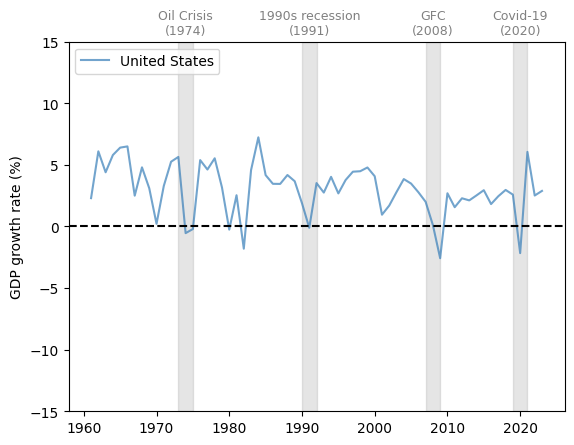

In [34]:
fig, ax = plt.subplots()

country = 'United States'
ylabel = 'GDP growth rate (%)'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

GDP growth is positive on average and trending slightly downward over time.

We also see fluctuations over GDP growth over time, some of which are quite large.

Let’s look at a few more countries to get a basis for comparison.

The United Kingdom (UK) has a similar pattern to the US, with a slow decline
in the growth rate and significant fluctuations.

Notice the very large dip during the Covid-19 pandemic.

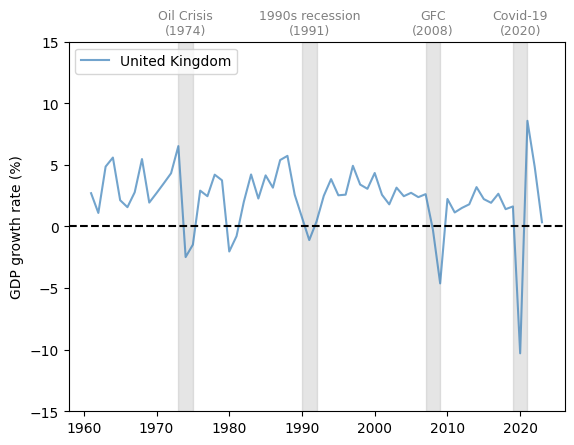

In [35]:
fig, ax = plt.subplots()

country = 'United Kingdom'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

Now let’s consider Japan, which experienced rapid growth in the 1960s and
1970s, followed by slowed expansion in the past two decades.

Major dips in the growth rate coincided with the Oil Crisis of the 1970s, the
Global Financial Crisis (GFC) and the Covid-19 pandemic.

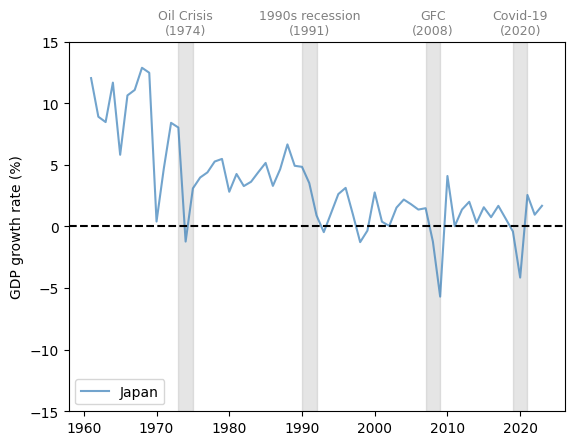

In [36]:
fig, ax = plt.subplots()

country = 'Japan'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

Now let’s study Greece.

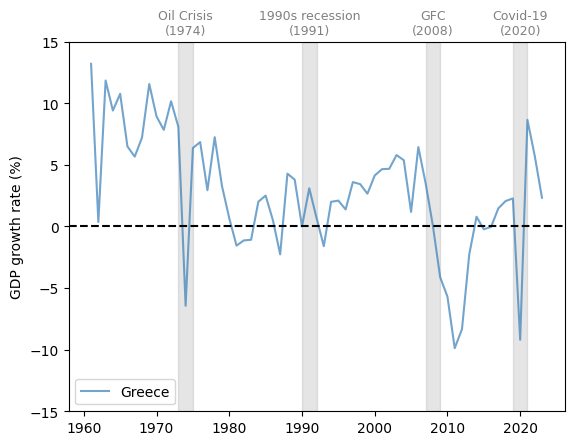

In [37]:
fig, ax = plt.subplots()

country = 'Greece'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

Greece experienced a very large drop in GDP growth around 2010-2011, during the peak
of the Greek debt crisis.

Next let’s consider Argentina.

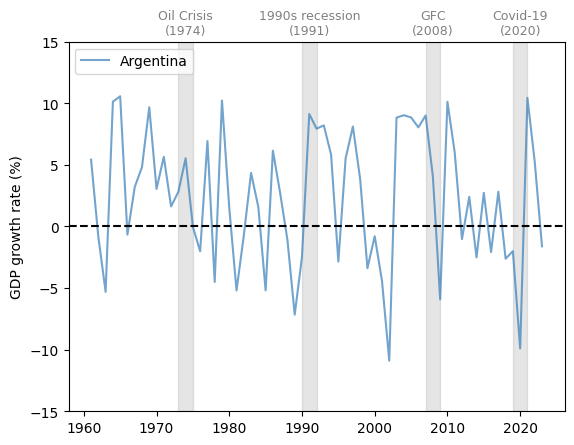

In [38]:
fig, ax = plt.subplots()

country = 'Argentina'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

Notice that Argentina has experienced far more volatile cycles than
the economies examined above.

At the same time, Argentina’s growth rate did not fall during the two developed
economy recessions in the 1970s and 1990s.

## Unemployment

Another important measure of business cycles is the unemployment rate.

We study unemployment using rate data from FRED spanning from [1929-1942](https://fred.stlouisfed.org/series/M0892AUSM156SNBR) to [1948-2022](https://fred.stlouisfed.org/series/UNRATE), combined unemployment rate data over 1942-1948 estimated by the [Census Bureau](https://www.census.gov/library/publications/1975/compendia/hist_stats_colonial-1970.html).

In [39]:
start_date = datetime.datetime(1929, 1, 1)
end_date = datetime.datetime(1942, 6, 1)

unrate_history = web.DataReader('M0892AUSM156SNBR', 
                    'fred', start_date,end_date)
unrate_history.rename(columns={'M0892AUSM156SNBR': 'UNRATE'}, 
                inplace=True)

start_date = datetime.datetime(1948, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

unrate = web.DataReader('UNRATE', 'fred', 
                    start_date, end_date)

Let’s plot the unemployment rate in the US from 1929 to 2022 with recessions
defined by the NBER.

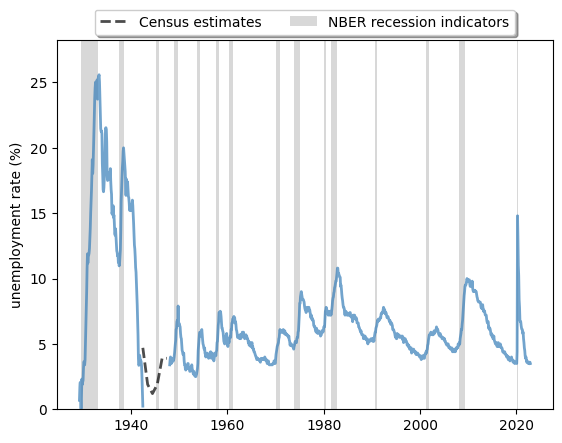

In [40]:
# We use the census bureau's estimate for the unemployment rate 
# between 1942 and 1948
years = [datetime.datetime(year, 6, 1) for year in range(1942, 1948)]
unrate_census = [4.7, 1.9, 1.2, 1.9, 3.9, 3.9]

unrate_census = {'DATE': years, 'UNRATE': unrate_census}
unrate_census = pd.DataFrame(unrate_census)
unrate_census.set_index('DATE', inplace=True)

# Obtain the NBER-defined recession periods
start_date = datetime.datetime(1929, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

nber = web.DataReader('USREC', 'fred', start_date, end_date)

fig, ax = plt.subplots()

ax.plot(unrate_history, **g_params, 
        color='#377eb8', 
        linestyle='-', linewidth=2)
ax.plot(unrate_census, **g_params, 
        color='black', linestyle='--', 
        label='Census estimates', linewidth=2)
ax.plot(unrate, **g_params, color='#377eb8', 
        linestyle='-', linewidth=2)

# Draw gray boxes according to NBER recession indicators
ax.fill_between(nber.index, 0, 1,
                where=nber['USREC']==1, 
                color='grey', edgecolor='none',
                alpha=0.3, 
                transform=ax.get_xaxis_transform(), 
                label='NBER recession indicators')
ax.set_ylim([0, ax.get_ylim()[1]])
ax.legend(loc='upper center', 
          bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=True, shadow=True)
ax.set_ylabel('unemployment rate (%)')

plt.show()

The plot shows that

- expansions and contractions of the labor market have been highly correlated
  with recessions.  
- cycles are, in general, asymmetric: sharp rises in unemployment are followed
  by slow recoveries.  


It also shows us how unique labor market conditions were in the US during the
post-pandemic recovery.

The labor market recovered at an unprecedented rate after the shock in 2020-2021.


<a id='synchronization'></a>

## Synchronization

In our [previous discussion](#gdp-growth), we found that developed economies have had
relatively synchronized periods of recession.

At the same time, this synchronization did not appear in Argentina until the 2000s.

Let’s examine this trend further.

With slight modifications, we can use our previous function to draw a plot
that includes multiple countries.

In [41]:

def plot_comparison(data, countries, 
                        ylabel, txt_pos, y_lim, ax, 
                        g_params, b_params, t_params, 
                        baseline=0):
    """
    Plot multiple series on the same graph

    Parameters
    ----------
    data : pd.DataFrame
        Data to plot
    countries : list
        List of countries to plot
    ylabel : str
        Label of the y-axis
    txt_pos : float
        Position of the recession labels
    y_lim : float
        Limit of the y-axis
    ax : matplotlib.axes._subplots.AxesSubplot
        Axes to plot on
    g_params : dict
        Parameters for the lines
    b_params : dict
        Parameters for the recession highlights
    t_params : dict
        Parameters for the recession labels
    baseline : float, optional
        Dashed baseline on the plot, by default 0
    
    Returns
    -------
    ax : matplotlib.axes.Axes
        Axes with the plot.
    """
    
    # Allow the function to go through more than one series
    for country in countries:
        ax.plot(data.loc[country], label=country, **g_params)
    
    # Highlight recessions
    ax.axvspan(1973, 1975, **b_params)
    ax.axvspan(1990, 1992, **b_params)
    ax.axvspan(2007, 2009, **b_params)
    ax.axvspan(2019, 2021, **b_params)
    if y_lim != None:
        ax.set_ylim([-y_lim, y_lim])
    ylim = ax.get_ylim()[1]
    ax.text(1974, ylim + ylim*txt_pos, 
            'Oil Crisis\n(1974)', **t_params) 
    ax.text(1991, ylim + ylim*txt_pos, 
            '1990s recession\n(1991)', **t_params) 
    ax.text(2008, ylim + ylim*txt_pos, 
            'GFC\n(2008)', **t_params) 
    ax.text(2020, ylim + ylim*txt_pos, 
            'Covid-19\n(2020)', **t_params) 
    if baseline != None:
        ax.hlines(y=baseline, xmin=ax.get_xlim()[0], 
                  xmax=ax.get_xlim()[1], color='black', 
                  linestyle='--')
    ax.set_ylabel(ylabel)
    ax.legend()
    return ax

# Define graphical parameters 
g_params = {'alpha': 0.7}
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'color':'grey', 'fontsize': 9, 
            'va':'center', 'ha':'center'}

Here we compare the GDP growth rate of developed economies and developing economies.

In [42]:
# Obtain GDP growth rate for a list of countries
gdp_growth = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG',
            ['CHN', 'USA', 'DEU', 'BRA', 'ARG', 'GBR', 'JPN', 'MEX'], 
            labels=True)
gdp_growth = gdp_growth.set_index('Country')
gdp_growth.columns = gdp_growth.columns.str.replace('YR', '').astype(int)

We use the United Kingdom, United States, Germany, and Japan as examples of developed economies.

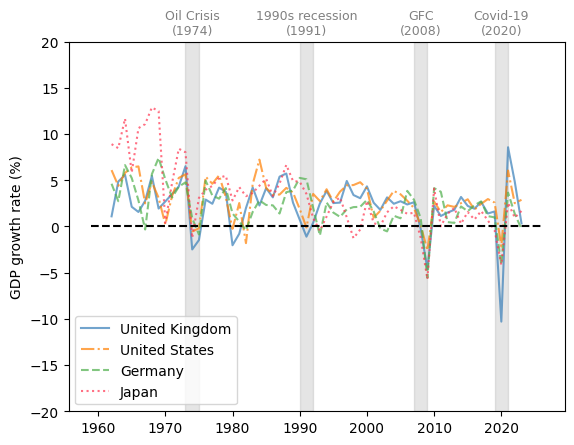

In [43]:
fig, ax = plt.subplots()
countries = ['United Kingdom', 'United States', 'Germany', 'Japan']
ylabel = 'GDP growth rate (%)'
plot_comparison(gdp_growth.loc[countries, 1962:], 
                countries, ylabel,
                0.1, 20, ax, 
                g_params, b_params, t_params)
plt.show()

We choose Brazil, China, Argentina, and Mexico as representative developing economies.

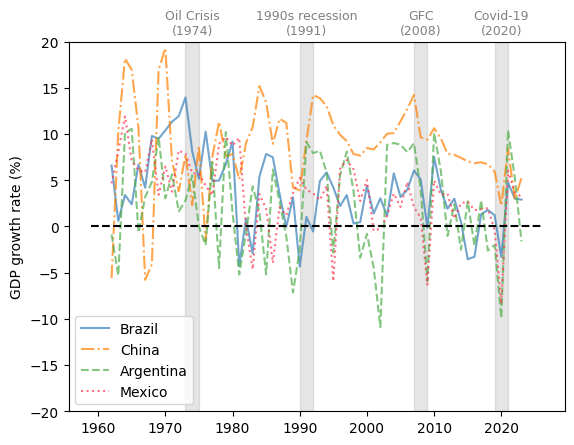

In [44]:
fig, ax = plt.subplots()
countries = ['Brazil', 'China', 'Argentina', 'Mexico']
plot_comparison(gdp_growth.loc[countries, 1962:], 
                countries, ylabel, 
                0.1, 20, ax, 
                g_params, b_params, t_params)
plt.show()

The comparison of GDP growth rates above suggests that
business cycles are becoming more synchronized in 21st-century recessions.

However, emerging and less developed economies often experience more volatile
changes throughout the economic cycles.

Despite the synchronization in GDP growth, the experience of individual countries during
the recession often differs.

We use the unemployment rate and the recovery of labor market conditions
as another example.

Here we compare the unemployment rate of the United States,
the United Kingdom, Japan, and France.

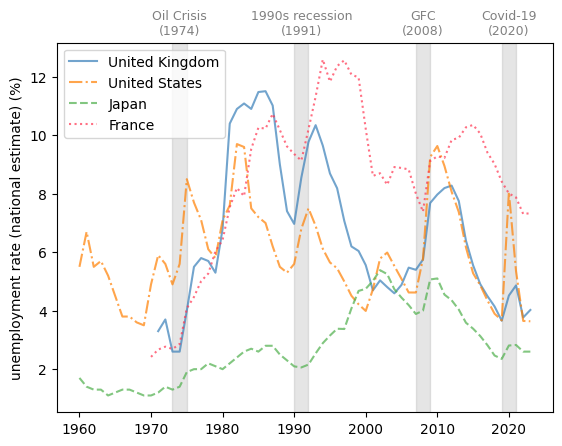

In [45]:
unempl_rate = wb.data.DataFrame('SL.UEM.TOTL.NE.ZS',
    ['USA', 'FRA', 'GBR', 'JPN'], labels=True)
unempl_rate = unempl_rate.set_index('Country')
unempl_rate.columns = unempl_rate.columns.str.replace('YR', '').astype(int)

fig, ax = plt.subplots()

countries = ['United Kingdom', 'United States', 'Japan', 'France']
ylabel = 'unemployment rate (national estimate) (%)'
plot_comparison(unempl_rate, countries, 
                ylabel, 0.05, None, ax, g_params, 
                b_params, t_params, baseline=None)
plt.show()

We see that France, with its strong labor unions, typically experiences
relatively slow labor market recoveries after negative shocks.

We also notice that Japan has a history of very low and stable unemployment rates.

## Leading indicators and correlated factors

Examining leading indicators and correlated factors helps policymakers to
understand the causes and results of business cycles.

We will discuss potential leading indicators and correlated factors from three
perspectives: consumption, production, and credit level.

### Consumption

Consumption depends on consumers’ confidence towards their
income and the overall performance of the economy in the future.

One widely cited indicator for consumer confidence is the [consumer sentiment index](https://fred.stlouisfed.org/series/UMCSENT) published by the University
of Michigan.

Here we plot the University of Michigan Consumer Sentiment Index and
year-on-year
[core consumer price index](https://fred.stlouisfed.org/series/CPILFESL)
(CPI) change from 1978-2022 in the US.

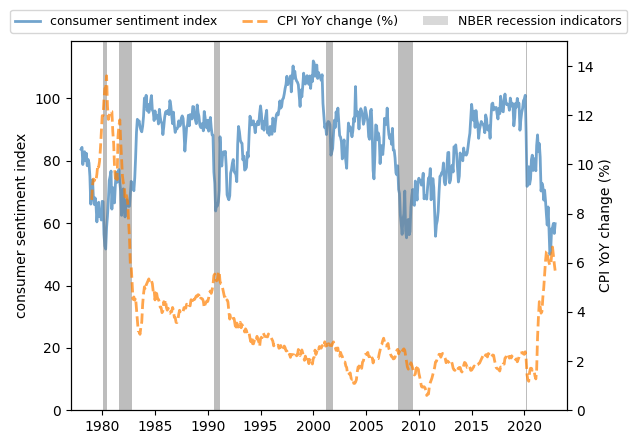

In [46]:
start_date = datetime.datetime(1978, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

# Limit the plot to a specific range
start_date_graph = datetime.datetime(1977, 1, 1)
end_date_graph = datetime.datetime(2023, 12, 31)

nber = web.DataReader('USREC', 'fred', start_date, end_date)
consumer_confidence = web.DataReader('UMCSENT', 'fred', 
                                start_date, end_date)

fig, ax = plt.subplots()
ax.plot(consumer_confidence, **g_params, 
        color='#377eb8', linestyle='-', 
        linewidth=2)
ax.fill_between(nber.index, 0, 1, 
            where=nber['USREC']==1, 
            color='grey', edgecolor='none',
            alpha=0.3, 
            transform=ax.get_xaxis_transform(), 
            label='NBER recession indicators')
ax.set_ylim([0, ax.get_ylim()[1]])
ax.set_ylabel('consumer sentiment index')

# Plot CPI on another y-axis
ax_t = ax.twinx()
inflation = web.DataReader('CPILFESL', 'fred', 
                start_date, end_date).pct_change(12)*100

# Add CPI on the legend without drawing the line again
ax_t.plot(2020, 0, **g_params, linestyle='-', 
          linewidth=2, label='consumer sentiment index')
ax_t.plot(inflation, **g_params, 
          color='#ff7f00', linestyle='--', 
          linewidth=2, label='CPI YoY change (%)')

ax_t.fill_between(nber.index, 0, 1,
                  where=nber['USREC']==1, 
                  color='grey', edgecolor='none',
                  alpha=0.3, 
                  transform=ax.get_xaxis_transform(), 
                  label='NBER recession indicators')
ax_t.set_ylim([0, ax_t.get_ylim()[1]])
ax_t.set_xlim([start_date_graph, end_date_graph])
ax_t.legend(loc='upper center',
            bbox_to_anchor=(0.5, 1.1),
            ncol=3, fontsize=9)
ax_t.set_ylabel('CPI YoY change (%)')
plt.show()

We see that

- consumer sentiment often remains high during expansions and
  drops before recessions.  
- there is a clear negative correlation between consumer sentiment and the CPI.  


When the price of consumer commodities rises, consumer confidence diminishes.

This trend is more significant during [stagflation](https://en.wikipedia.org/wiki/Stagflation).

### Production

Real industrial output is highly correlated with recessions in the economy.

However, it is not a leading indicator, as the peak of contraction in production
is delayed relative to consumer confidence and inflation.

We plot the real industrial output change from the previous year
from 1919 to 2022 in the US to show this trend.

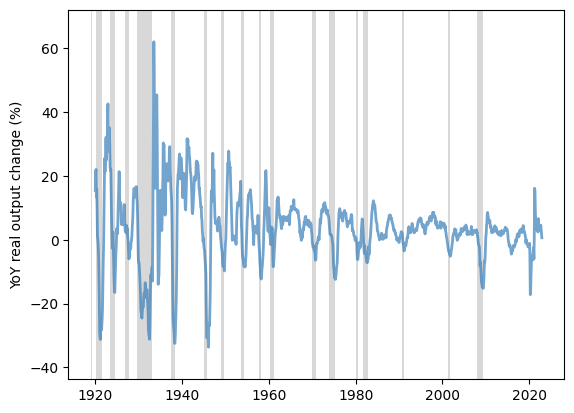

In [47]:
start_date = datetime.datetime(1919, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

nber = web.DataReader('USREC', 'fred', 
                    start_date, end_date)
industrial_output = web.DataReader('INDPRO', 'fred', 
                    start_date, end_date).pct_change(12)*100

fig, ax = plt.subplots()
ax.plot(industrial_output, **g_params, 
        color='#377eb8', linestyle='-', 
        linewidth=2, label='Industrial production index')
ax.fill_between(nber.index, 0, 1,
                where=nber['USREC']==1, 
                color='grey', edgecolor='none',
                alpha=0.3, 
                transform=ax.get_xaxis_transform(), 
                label='NBER recession indicators')
ax.set_ylim([ax.get_ylim()[0], ax.get_ylim()[1]])
ax.set_ylabel('YoY real output change (%)')
plt.show()

We observe the delayed contraction in the plot across recessions.

### Credit level

Credit contractions often occur during recessions, as lenders become more
cautious and borrowers become more hesitant to take on additional debt.

This is due to factors such as a decrease in overall economic
activity and gloomy expectations for the future.

One example is domestic credit to the private sector by banks in the UK.

The following graph shows the domestic credit to the private sector as a
percentage of GDP by banks from 1970 to 2022 in the UK.

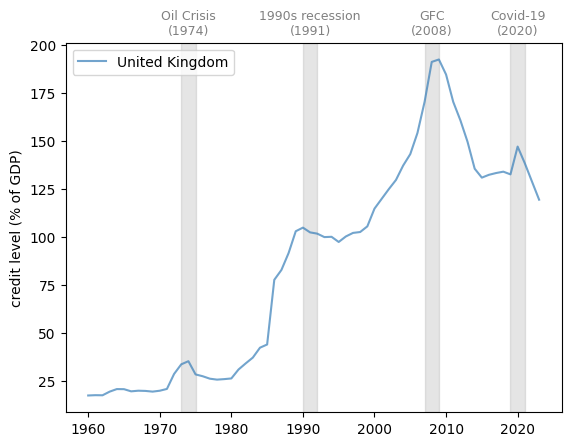

In [48]:
private_credit = wb.data.DataFrame('FS.AST.PRVT.GD.ZS', 
                ['GBR'], labels=True)
private_credit = private_credit.set_index('Country')
private_credit.columns = private_credit.columns.str.replace('YR', '').astype(int)

fig, ax = plt.subplots()

countries = 'United Kingdom'
ylabel = 'credit level (% of GDP)'
ax = plot_series(private_credit, countries, 
                 ylabel, 0.05, ax, g_params, b_params, 
                 t_params, ylim=None, baseline=None)
plt.show()

Note that the credit rises during economic expansions
and stagnates or even contracts after recessions.